Se importan las librerías que vamos a utilizar.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Carga de set de datos**

Se cargan los archivos del set de datos.

In [168]:
trata = pd.read_excel('set-de-datos/data_glotip.xlsx') #Lectura de Archivo

Informacion del dataframe.

In [59]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46558 entries, 0 to 46557
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UNODC              46532 non-null  object
 1   unodc_ddds@un.org  45600 non-null  object
 2   Unnamed: 2         45600 non-null  object
 3   Unnamed: 3         45600 non-null  object
 4   Unnamed: 4         46557 non-null  object
 5   Unnamed: 5         46557 non-null  object
 6   Unnamed: 6         46470 non-null  object
 7   Unnamed: 7         46557 non-null  object
 8   Unnamed: 8         46557 non-null  object
 9   Unnamed: 9         46557 non-null  object
 10  Unnamed: 10        46557 non-null  object
 11  Unnamed: 11        46557 non-null  object
 12  Unnamed: 12        46557 non-null  object
dtypes: object(13)
memory usage: 4.6+ MB


Se realiza vista previa del dataframe.

In [169]:
trata.head()

,UNODC,unodc_ddds@un.org,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,30/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,txtVALUE,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP


Elimino el primer y segundo registro que son irrelevantes.

In [170]:
trata = trata.drop(0)
trata = trata.drop(1)

trata.head()

,UNODC,unodc_ddds@un.org,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP
5,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103,GLOTIP
6,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167,GLOTIP


Renombre de columnas.

In [171]:
trata.rename(columns={'UNODC': 'Code', 'unodc_ddds@un.org': 'Country', 'Unnamed: 2': 'Region', 'Unnamed: 3': 'Subregion', 'Unnamed: 4': 'Indicador', 'Unnamed: 5': 'Dimension', 'Unnamed: 6': 'Category', 'Unnamed: 7': 'Sex', 'Unnamed: 8': 'Age', 'Unnamed: 9': 'Year', 'Unnamed: 10': 'Unidad medida', 'Unnamed: 11': 'Value',  'Unnamed: 12': 'Source'}, inplace=True)
trata.head()

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP
5,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103,GLOTIP
6,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167,GLOTIP


In [172]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46556 entries, 2 to 46557
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Code           46530 non-null  object
 1   Country        45599 non-null  object
 2   Region         45599 non-null  object
 3   Subregion      45599 non-null  object
 4   Indicador      46556 non-null  object
 5   Dimension      46556 non-null  object
 6   Category       46469 non-null  object
 7   Sex            46556 non-null  object
 8   Age            46556 non-null  object
 9   Year           46556 non-null  object
 10  Unidad medida  46556 non-null  object
 11  Value          46556 non-null  object
 12  Source         46556 non-null  object
dtypes: object(13)
memory usage: 4.6+ MB


In [173]:
trata.describe()

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
count,46530,45599,45599,45599,46556,46556,46469,46556,46556,46556,46556,46556,46556
unique,207,200,5,17,5,4,435,5,4,19,1,1250,1
top,NLD,Netherlands,Europe,Latin America and the Caribbean,Detected trafficking victims,Total,Total,Total,Total,2018,Counts,<5,GLOTIP
freq,1094,1094,18415,7896,32364,23802,23802,26824,26647,6407,46556,23076,46556


Limpieza de datos

Se agregan y remplazan códigos de país.

In [174]:
for x in trata.index:
  if trata.loc[x, 'Country'] == 'Sark':
     trata.loc[x, 'Code'] = 'CRQ'
trata[trata['Country'] == 'Sark']

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
37753,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2017,Counts,<5,GLOTIP
37754,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2018,Counts,<5,GLOTIP
37755,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,18 years or over,2018,Counts,<5,GLOTIP
37756,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Male,0 to 17 years,2018,Counts,<5,GLOTIP
37757,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,by form of exploitation,Sexual exploitation,Male,18 years or over,2018,Counts,<5,GLOTIP
37758,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2019,Counts,<5,GLOTIP
37759,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Male,0 to 17 years,2019,Counts,<5,GLOTIP
37760,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,by form of exploitation,Sexual exploitation,Male,18 years or over,2019,Counts,<5,GLOTIP
37761,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2020,Counts,<5,GLOTIP
37762,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,18 years or over,2020,Counts,<5,GLOTIP


In [175]:
trata[trata['Code'] == 'Aruba/Curacao']

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
2670,Aruba/Curacao,NaN,NaN,NaN,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,<5,GLOTIP


In [176]:
for x in trata.index:
  if trata.loc[x, 'Code'] == 'Aruba/Curacao':
     trata.loc[x, 'Code'] = 'ABW'
trata[trata['Code'] == 'ABW']

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
2670,ABW,NaN,NaN,NaN,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,<5,GLOTIP


In [177]:
trata.loc[2670, 'Country'] = 'Aruba/Curacao'
trata[trata['Code'] == 'ABW']

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
2670,ABW,Aruba/Curacao,NaN,NaN,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,<5,GLOTIP


In [178]:
trata.loc[2670, 'Region'] = 'Americas'
trata[trata['Code'] == 'ABW']

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
2670,ABW,Aruba/Curacao,Americas,NaN,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,<5,GLOTIP


In [179]:
trata.loc[2670, 'Subregion'] = 'Latin America and the Caribbean'
trata[trata['Code'] == 'ABW']

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
2670,ABW,Aruba/Curacao,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Venezuela (Bolivarian Republic of),Total,Total,2011,Counts,<5,GLOTIP


In [180]:
conjunto_valores = ['CAR', 'CAS', 'MCA', 'MCN', 'EEU', 'SAF', 'SAM' ]
condicion = trata['Code'].isin(conjunto_valores)
trata = trata.drop(trata[condicion].index)

In [181]:
trata['Value'] = trata['Value'].replace('<5', '3')
trata['Value'] = trata['Value'].str.replace(',', '')

Columna "Dimension"

In [182]:
valores_unicos = trata['Dimension'].unique()
list(valores_unicos)

['by country of repatriation',
 'Total',
 'by form of exploitation',
 'by citizenship']

Dejamos sólo los valores para formas de explotación.

In [188]:
trata_exp=trata
trata_exp = trata_exp[trata_exp['Dimension'] == 'by form of exploitation']


In [189]:
valores_unicos = trata_exp['Category'].unique()
list(valores_unicos)

['Forced labour', 'Sexual exploitation', 'Other forms of exploitation']

In [190]:
valores_unicos = trata_exp['Sex'].unique()
list(valores_unicos)

['Total', 'Female', 'Male', 'Other', 'Unknown']

In [191]:
trata_exp = trata_exp[trata_exp["Sex"] != 'Total']

In [192]:
trata_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5741 entries, 42 to 46556
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Code           5741 non-null   object
 1   Country        5741 non-null   object
 2   Region         5741 non-null   object
 3   Subregion      5741 non-null   object
 4   Indicador      5741 non-null   object
 5   Dimension      5741 non-null   object
 6   Category       5741 non-null   object
 7   Sex            5741 non-null   object
 8   Age            5741 non-null   object
 9   Year           5741 non-null   object
 10  Unidad medida  5741 non-null   object
 11  Value          5741 non-null   object
 12  Source         5741 non-null   object
dtypes: object(13)
memory usage: 627.9+ KB


Luego de eliminar valores, se revisa nuevamente

Valores unicos de la columna

In [193]:
valores_unicos = trata_exp["Dimension"].unique()

print(valores_unicos)

['by form of exploitation']


Valores pertenecientes a "by form of explotation":

In [194]:
conteos = trata_exp["Dimension"].value_counts()
print(conteos)

Dimension
by form of exploitation    5741
Name: count, dtype: int64


In [195]:
conteos = trata_exp["Category"].value_counts()
print(conteos)

Category
Sexual exploitation            2003
Forced labour                  1940
Other forms of exploitation    1798
Name: count, dtype: int64


In [196]:
trata_exp.describe()

,Code,Country,Region,Subregion,Indicador,Dimension,Category,Sex,Age,Year,Unidad medida,Value,Source
count,5741,5741,5741,5741,5741,5741,5741,5741,5741,5741,5741,5741,5741
unique,126,126,5,17,1,1,3,4,3,8,1,296,1
top,THA,Thailand,Europe,Latin America and the Caribbean,Detected trafficking victims,by form of exploitation,Sexual exploitation,Female,18 years or over,2018,Counts,3,GLOTIP
freq,129,129,2368,1054,5741,5741,2003,2643,2835,1141,5741,3878,5741


Observar las categorías y su comportamiento por edad.

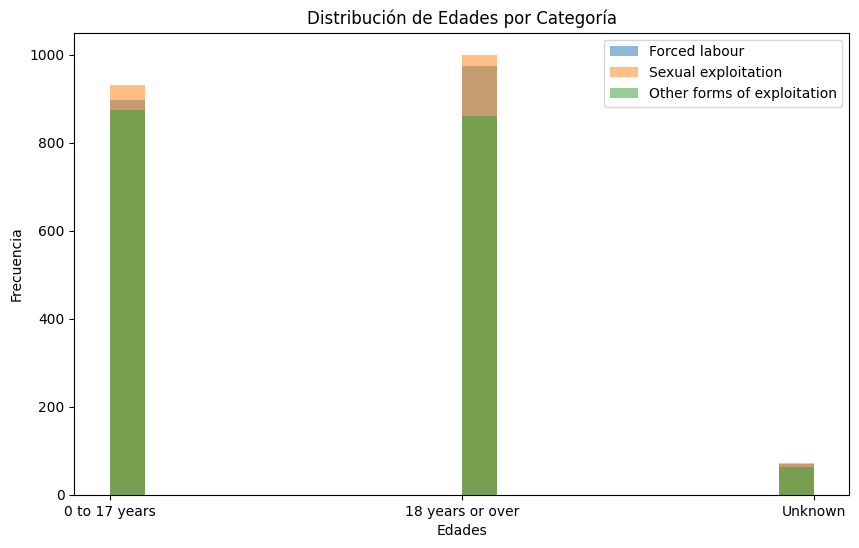

In [197]:
categorias_unicas = trata_exp['Category'].unique()

plt.figure(figsize=(10, 6))
for categoria in categorias_unicas:
    subset_data = trata_exp[trata_exp['Category'] == categoria]
    edades = subset_data['Age']
    plt.hist(edades, bins=20, alpha=0.5, label=categoria)

plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades por Categoría')
plt.legend()

plt.show()


Categorias de "Sexual exploitation" y "Forced labour".

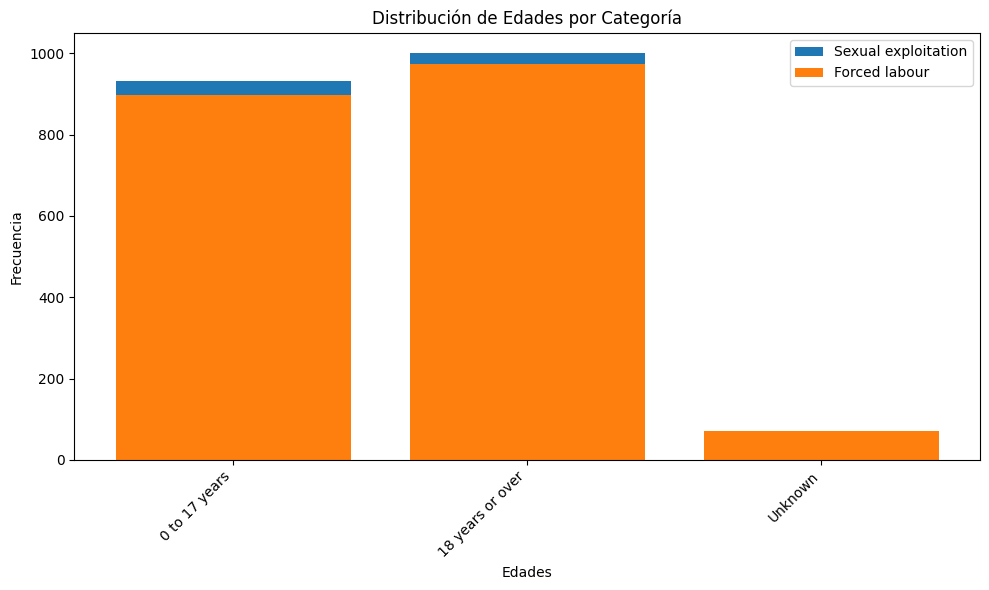

In [198]:
categorias_seleccionadas = ["Sexual exploitation", "Forced labour"]
data_filtrado = trata_exp[trata_exp['Category'].isin(categorias_seleccionadas)]

plt.figure(figsize=(10, 6))
frecuencias = trata_exp.groupby(['Age', 'Category']).size().unstack(fill_value=0)

edades_unicas = trata_exp['Age'].unique()

for categoria in categorias_seleccionadas:
    frecuencia_categoria = frecuencias[categoria]
    x = range(len(edades_unicas))
    plt.bar(x, frecuencia_categoria, label=categoria)

plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades por Categoría')
plt.xticks(x, edades_unicas, rotation=45, ha='right')

plt.legend()
plt.tight_layout()

plt.show()

# Regresión Lineal

In [199]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Cambio el valor de "Value" a entero.

In [200]:
trata_exp['Value'] = trata_exp['Value'].astype(int)

In [201]:
trata_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5741 entries, 42 to 46556
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Code           5741 non-null   object
 1   Country        5741 non-null   object
 2   Region         5741 non-null   object
 3   Subregion      5741 non-null   object
 4   Indicador      5741 non-null   object
 5   Dimension      5741 non-null   object
 6   Category       5741 non-null   object
 7   Sex            5741 non-null   object
 8   Age            5741 non-null   object
 9   Year           5741 non-null   object
 10  Unidad medida  5741 non-null   object
 11  Value          5741 non-null   int32 
 12  Source         5741 non-null   object
dtypes: int32(1), object(12)
memory usage: 605.5+ KB


In [202]:
numero_casos= trata_exp.groupby('Year')['Value'].sum().reset_index()

numero_casos

,Year,Value
0,2014,7954
1,2015,10961
2,2016,10959
3,2017,21794
4,2018,22252
5,2019,40266
6,2020,39023
7,2021,24267


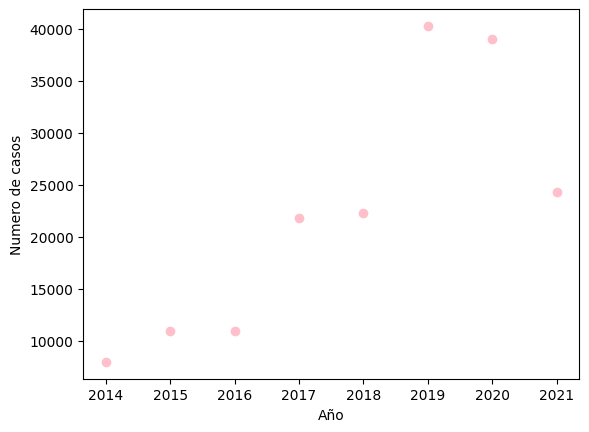

In [203]:
plt.ylabel("Numero de casos")
plt.xlabel("Año")
plt.scatter(numero_casos["Year"], numero_casos["Value"], color="pink")
plt.show()

Aplico el modelo.

In [204]:
regresion1 = linear_model.LinearRegression()

In [205]:
años1= numero_casos["Year"].values.reshape((-1,1))
años1

array([[2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021]], dtype=int64)

In [206]:
X= años1
y = numero_casos["Value"]

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

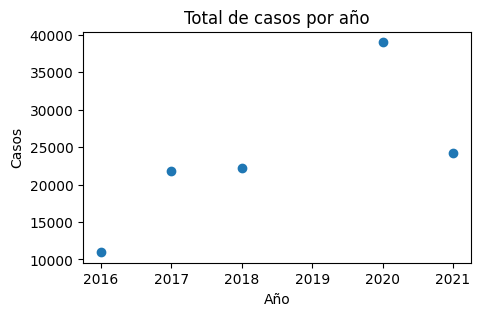

In [208]:
plt.figure(figsize= (5,3))
plt.scatter(X_train, y_train)
plt.ticklabel_format(style="plain")

plt.xlabel("Año")
plt.ylabel("Casos")
plt.title("Total de casos por año")
plt.show()

In [209]:
regr1 = LinearRegression()

In [210]:
regr1.fit(X_train,y_train)

LinearRegression()

In [211]:
print(f"Coeficiente :{regr1.coef_[0]}")

Coeficiente :3477.732558139534


In [212]:
print(f"Intercepto: {regr1.intercept_}")

Intercepto: -6995796.395348836


In [213]:
y_predict1 = regr1.predict (X_test)
y_predict1

array([11834.70930232, 25745.63953488,  8356.97674419])

In [214]:
from sklearn.metrics import r2_score

escor= r2_score(y_test, y_predict1)
escor

0.6677111445647981

<function matplotlib.pyplot.show(close=None, block=None)>

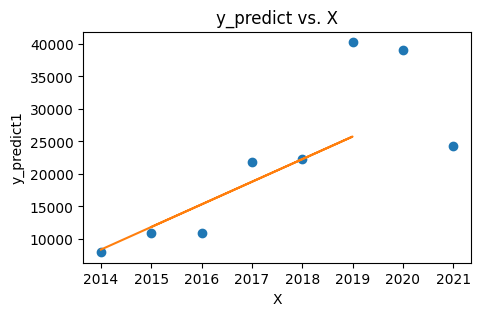

In [142]:
plt.figure(figsize=(5,3))
plt.plot(X, y, "o")
plt.plot(X_test,y_predict1)
plt.title ("y_predict vs. X")
plt.xlabel("X")
plt.ylabel("y_predict1")
plt.ticklabel_format(style="plain")
plt.show

Prediccion hasta el año 2040

In [221]:
X_future1 = np.array(range(2021,2041)).reshape(-1,1)
X_future1.shape

(20, 1)

In [223]:
futuro1 =regr1.predict(X_future1)

<function matplotlib.pyplot.show(close=None, block=None)>

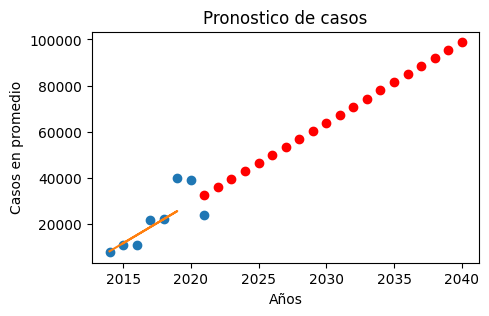

In [224]:
plt.figure(figsize=(5,3))
plt.plot(X, y, "o")
plt.plot(X_test, y_predict1)
plt.scatter(X_future1, futuro1, color= "red")
plt.title ("Pronostico de casos")
plt.xlabel("Años")
plt.ylabel("Casos en promedio")
plt.ticklabel_format(style="plain")
plt.show